# **import Libraries**

In [3]:
from IPython.display import Image, display

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
import cv2
import numpy as np
import glob
import ntpath
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import albumentations as A
!pip install labelme
import warnings
warnings.filterwarnings("ignore")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 15.3 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466366 sha256=0da6271fa8f96ba2ea885c8762996b1ec76407679e60af9a1c60149dfc62eaa0
  Stored in directory: /root/.cache/pip/wheels/73/89/84/442d4814015c451509500658c0cbe3aff0c

# **1. Exploratory Data Analysis (EDA)**

In [4]:
file_path="/content/drive/MyDrive/Fish images for ML Syed/GH012267_0722_L_ehrenbergii-1.jpg"
images_path=glob.glob("/content/drive/MyDrive/Fish images for ML Syed/*.jpg")


## **1.1 Apply Dimensionally Reduction  PCA for one Image**

numpy.ndarray

(86, 205, 3)

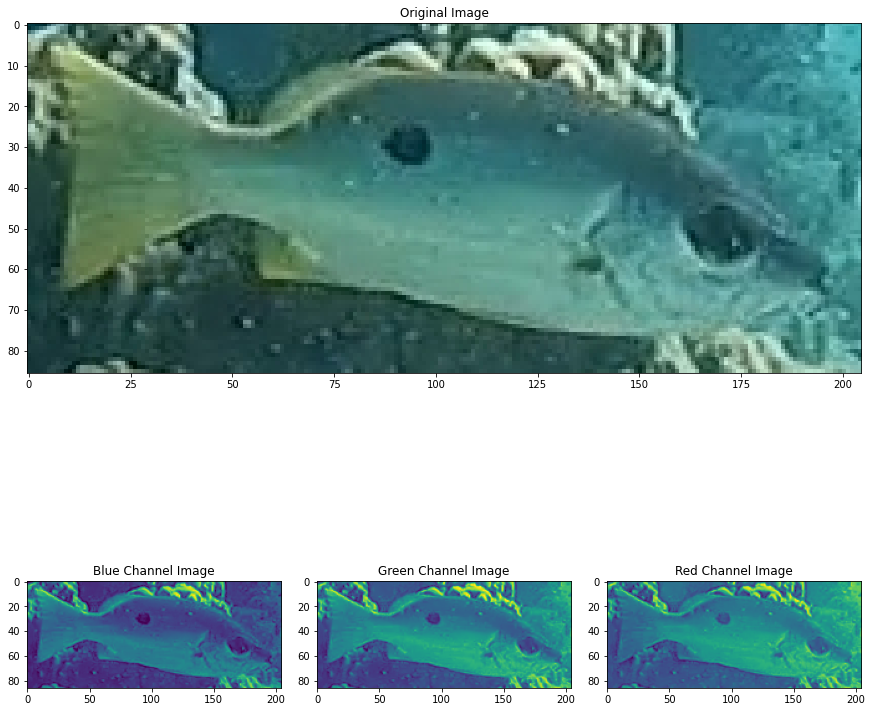

In [ ]:
FImage=plt.imread(images_path[15])

display(type(FImage),FImage.shape)

BChannel,GChannel,RChannel=cv2.split(FImage) # since the images have 3 bands of channel its better to split it for PCA
#display(BChannel.shape,GChannel.shape,RChannel.shape)

fig=plt.figure(figsize=(12, 12),constrained_layout=True)

GridSpace = gridspec.GridSpec(2, 3,figure=fig)
ax1=fig.add_subplot(GridSpace[0,:])
ax1.set_title('Original Image', fontsize = 12)
ax1.imshow(FImage)

ax2=fig.add_subplot(GridSpace[1,0])
ax2.set_title('Blue Channel Image', fontsize = 12)
ax2.imshow(BChannel)

ax3=fig.add_subplot(GridSpace[1,1])
ax3.set_title('Green Channel Image', fontsize = 12)
ax3.imshow(GChannel)

ax4=fig.add_subplot(GridSpace[1,2])
ax4.set_title('Red Channel Image', fontsize = 12)
ax4.imshow(RChannel)
plt.show()

In [ ]:
blue_temp_df = pd.DataFrame(data = BChannel)
blue_temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2,3,0,1,0,43,95,128,129,95,...,18,94,99,88,78,84,79,77,70,63
1,0,16,29,56,83,150,167,135,96,85,...,47,108,92,92,83,69,60,57,62,69
2,68,97,146,183,194,182,172,123,74,83,...,51,115,89,86,82,66,46,43,63,78
3,163,157,193,186,148,110,96,98,106,132,...,54,116,101,93,85,73,66,65,69,80
4,173,166,168,145,92,79,82,93,98,109,...,65,92,98,91,81,79,80,79,73,74


In [ ]:
#scaled the data
BChannel_scaled=BChannel/255
GChannel_scaled=GChannel/255
RChannel_scaled=RChannel/255

#Plotting explained variance:plot the cumulative sum of explained variance for a high-dimensional features
#Blue Channel
pca_Blue=PCA(0.999)
pca_Blue.fit(BChannel_scaled)
exp_var_cumulB = np.cumsum(pca_Blue.explained_variance_ratio_)
figure_=px.area(x=range(1, exp_var_cumulB.shape[0] + 1),y=exp_var_cumulB,
        labels={"x": "Number pf PCA Components", "y": "Explained Variance percentage"})
figure_.update_layout(
    plot_bgcolor='white'
)
figure_.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
figure_.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

In [ ]:
## loop through range of maximum Variance
temp_dict={}
for per in [0.99,0.98,0.96,0.95]:
  pca_Blue=PCA(per)
  pca_Blue.fit(BChannel_scaled)
  exp_varB = pca_Blue.explained_variance_ratio_ * 100
  temp_dict[per]=np.sum(exp_varB.shape[0])
print("the Max variance with number of Components: ",temp_dict)


the Max variance with number of Components:  {0.99: 44, 0.98: 35, 0.96: 27, 0.95: 24}


In [ ]:
#Apply PCA to RGB Channels
#since we have different image sizes with range of different features, the optimal maximum variance will be 0.99
M_variance=0.99
pca_Blue=PCA(M_variance)
pca_Blue.fit(BChannel_scaled)
pca_pca_BlueT = pca_Blue.fit_transform(BChannel_scaled)

pca_Green=PCA(M_variance)
pca_Green.fit(GChannel_scaled)
pca_pca_GreenT = pca_Green.fit_transform(GChannel_scaled)

pca_Red=PCA(M_variance)
pca_Red.fit(RChannel_scaled)
pca_pca_RedT = pca_Red.fit_transform(RChannel_scaled)


#inverse transform to merge

pca_BI = pca_Blue.inverse_transform(pca_pca_BlueT)
pca_GI = pca_Green.inverse_transform(pca_pca_GreenT)
pca_RI = pca_Red.inverse_transform(pca_pca_RedT)

#merge & Display the image

PCA_Image = cv2.merge((pca_BI, pca_GI, pca_RI))

fig=plt.figure(figsize=(12, 12),constrained_layout=True)

GridSpace = gridspec.GridSpec(1, 2,figure=fig)
ax1=fig.add_subplot(GridSpace[0,0])
ax1.set_title('Original Image', fontsize = 12)
ax1.imshow(FImage)

ax2=fig.add_subplot(GridSpace[0,1])
ax2.set_title('Reduced Image', fontsize = 12)
ax2.imshow(PCA_Image)
plt.show()


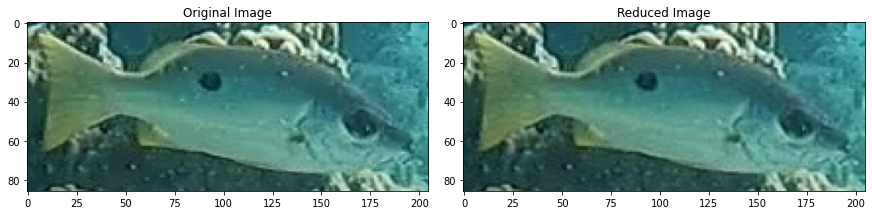

## **1.2 Apply PCA for all Images**

In [ ]:
# build Function for all data
def  PCA_Function(M_variance, BBand,Gband,Rband):
  M_variance=M_variance
  pca_Blue=PCA(M_variance)
  pca_Blue.fit(BBand)
  pca_BlueT = pca_Blue.fit_transform(BBand)

  pca_Green=PCA(M_variance)
  pca_Green.fit(Gband)
  pca_GreenT = pca_Green.fit_transform(Gband)

  pca_Red=PCA(M_variance)
  pca_Red.fit(Rband)
  pca_RedT = pca_Red.fit_transform(Rband)

  #inverse transform to merge
  pca_BI = pca_Blue.inverse_transform(pca_BlueT)
  pca_GI = pca_Green.inverse_transform(pca_GreenT)
  pca_RI = pca_Red.inverse_transform(pca_RedT)

  PCA_Image = cv2.merge((pca_BI, pca_GI, pca_RI))

  return PCA_Image

In [ ]:

head,tail = ntpath.split(images_path[1])
head,tail

('/content/drive/MyDrive/Fish images for ML Syed',
 'GH012267_0722_L_ehrenbergii-1.jpg')

In [ ]:
# apply PCA to all images and save the array in dict with its label
dict_Rimg={}
image_namels=[]
image_namearr=[]
for filename in images_path:
  #extract the file name from the psth
  head,tail = ntpath.split(filename)
  #print(tail)

  Imag=plt.imread(filename)
  #split channel and scale them
  BBand,Gband,Rband=cv2.split(Imag)
  BBand_scaled=BBand/255
  Gband_scaled=Gband/255
  Rband_scaled=Rband/255
  #call the function
  ReduceImg=PCA_Function(0.98, BBand_scaled,Gband_scaled,Rband_scaled)
  # save the result in dict
  image_namels.append(tail)
  image_namearr.append(ReduceImg)
  dict_Rimg["image_name"]=image_namels
  dict_Rimg["images_matrix"]=image_namearr
  


In [ ]:
#display all images from dict
for img in dict_Rimg["images_matrix"]:
  fig=plt.figure(figsize=(12, 12),constrained_layout=True)

  GridSpace = gridspec.GridSpec(1, 2,figure=fig)
  ax1=fig.add_subplot(GridSpace[0,0])
  ax1.imshow(img)
  plt.show()




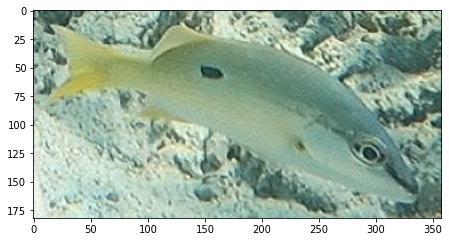

In [ ]:
 # display an image from dict
 img=dict_Rimg["images_matrix"][1]
 fig=plt.figure(figsize=(12, 12),constrained_layout=True)

GridSpace = gridspec.GridSpec(1, 2,figure=fig)
ax1=fig.add_subplot(GridSpace[0,0])
ax1.imshow(img)
plt.show()

## **1.3 Find the Correlation between PCA within one Image**

In [ ]:
pca = PCA(n_components=35)
pca_Blue = pca.fit_transform(BChannel_scaled)
varChannel = pca.explained_variance_ratio_ * 100
display(varChannel[:5],np.sum(varChannel),pca_Blue.shape)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(pca_Blue,labels=labels,dimensions=range(5),color=range(0,pca_Blue.shape[0]))
fig.update_layout(width=1200,height=1200)
fig.update_traces(diagonal_visible=False)
fig.show()

array([27.46738848, 16.59156504, 10.27303534,  7.07574108,  5.71865826])

98.05975798306156

(86, 35)

## **1.4 Plot the Fish classes**

In [ ]:
dataset_path="/content/drive/MyDrive/Fish images for ML Syed/List of images.xlsx"
dataF=pd.read_excel(dataset_path)
display(dataF.shape,dataF.head(20))
Target_df = dataF['Species'].value_counts()
Target_df.plot(kind='bar',align='center', figsize=(10,8),alpha=0.9)
plt.title('The classes in Fish Species Dataframe',fontsize=18)
plt.xlabel('Fish Species Types')
plt.ylabel('Number of each Type');
plt.show()

# **2. Image Preprocessing**

## **2.1 Image Annotation**

In [7]:
# use labeling me to define BBox around the object, in this case the fish is the object

# use YOLOv5 for object detection


QObject::moveToThread: Current thread (0x192f0d0) is not the object's thread (0x1fd6d60).
Cannot move to target thread (0x192f0d0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.8/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



## **2.2 Data Augmentation**

In [ ]:
## image Preprocessing for small dataset:
#img=cv2.imread(dict_Rimg["images_matrix"][15])
img=dict_Rimg["images_matrix"][15]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#random.seed(212) 
transform=A.Compose([A.HorizontalFlip(p=0.5),A.RandomRotate90(),A.Transpose(),
                     A.ShiftScaleRotate(p=0.5),A.OpticalDistortion(),A.Blur(blur_limit=3),
                     A.RandomBrightnessContrast(p=0.2),], bbox_params=A.BboxParams(format='coco'))
aug_img=transform(image=img)["image"]
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(aug_img)


KeyError: ignored

In [ ]:
len(aug_img)

86

# **3. Modeling**